## 1. Solve the 2D transient heat equation with the forward Euler method

Consider the transient heat equaiton on a square domain with $\alpha = 1$:

$~$

\begin{equation}
\frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \quad {\rm\ for\ } x \in [0,L], \quad y \in [0,L], \quad t \ge 0
\end{equation}

$~$

The boundary conditions are given by:

$~$

\begin{equation}
T(0,y,t) = 0 \quad {\rm\ for\ } y \in [0,L], \quad t \ge 0
\end{equation}

\begin{equation}
T(x,0,t) = x(L - x) \quad {\rm\ for\ } x \in [0,L], \quad t \ge 0
\end{equation}

\begin{equation}
T(x,L,t) = 0 \quad {\rm\ for\ } x \in [0,L], \quad t \ge 0
\end{equation}

\begin{equation}
\frac{\partial T}{\partial n} \biggr\rvert_{x=L} = 0 \quad {\rm\ for\ } y \in (0,L), \quad t \ge 0
\end{equation}

$~$

![](BCs.png){width=400px style="display: block; margin: 0 auto"}

$~$

- The Dirichlet conditions on the edges include the corner points
- The Neumann condition on the right edge exludes the corner points

$~$

$~$

The initial temperature distribution is given by:

\begin{equation}
T(x, y, 0) = \begin{cases}
			x(L-x)       & \text{if $y = 0$},\\
			0            & \text{otherwise}
		\end{cases}
\end{equation}

- This represents a plate with a heated bottom edge and insulated right edge

$~$

$~$

We will write a function ```heat2d_explicit(L, t_end, Nx, Ny, Nt, alpha=1)``` to implement the forward Euler scheme fror this problem. We'll use semi-discretization with a second order central difference scheme for the spatial derivatives and a first order one-sided difference approximation for the insulated boundary condition on the right edge.

The function inputs are given by:

| Name  | Type             | Description                                                                                                  |
|-------|------------------|--------------------------------------------------------------------------------------------------------------|
| L     | float            | Domain length (domain is $x \in [0, L] $)                                                                                                            |
| t_end | float            | Ending time for the simulation                                                                               |
| Nx    | int              | Number of intervals to use in x; there are $N_x + 1$ equally spaced grid points                              |
| Ny    | int              | Number of intervals to use in y; there are $N_y + 1$ equally spaced grid points                              |
| Nt    | int              | Number of time steps to take; there are $N_t +1$ equally spaced total time points to store in the simulation |
| alpha | float (optional) | Value of $\alpha$ (default value is 1 if not specified)                                                      |

$~$


The function should return the following:

| Name             | Type            | Description                                                                                                          |
|------------------|-----------------|----------------------------------------------------------------------------------------------------------------------|
| heatd2d_explicit | python function | Function to implement the forward Euler scheme for this problem                                                      |
| x                | 1D numpy array  | List of all of the $N_x + 1$ grid points                                                                             |
| y                | 1D numpy array  | List of all of the $N_y + 1$ grid points                                                                             |
| t                | 1D numpy array  | LIst of all of the $N_t + 1$ time points                                                                             |
| T                | 3D numpy array  | T[i, j, n] stores the solution $T(x_i,y_j,t_n)$. The array is $(N_x+1) \times (N_y + 1) \times (N_t+1)$ in size |

In [1]:
import numpy as np


def heat2d_explicit(L, t_end, Nx, Ny, Nt, alpha=1):
    """
    Solve the 2D transient heat equation with the forward Euler method
    and return the solution as a 3D array (one for each time step).

    Parameters:
    -----------
    L: float
        Length of the square domain
    t_end: float
        End time
    Nx: int
        Number of grid points in the x direction
    Ny: int
        Number of grid points in the y direction
    Nt: int
        Number of time steps
    alpha: float
        Diffusion coefficient

    Returns:
    --------
    T: array, shape (Nt, Nx, Ny)
        Temperature at each point in space and time
    """

    # Spatial discretization
    dx = L / Nx
    dy = L / Ny
    x = np.linspace(0, L, Nx + 1)
    y = np.linspace(0, L, Ny + 1)

    # Temporal discretization
    dt = t_end / Nt
    t = np.linspace(0, t_end, Nt + 1)

    # Stability condition check
    if alpha * dt / max(dx**2, dy**2) > 0.5:
        raise ValueError("Stability condition violated")

    # Initialize temperature array
    T = np.zeros((Nx + 1, Ny + 1, Nt + 1))

    # Initial condition
    T[:, 0, 0] = x * (L - x)  # Bottom edge

    # Time stepping
    for n in range(0, Nt):
        # Internal grid points
        for i in range(1, Nx):
            for j in range(1, Ny):
                T[i, j, n + 1] = T[i, j, n] + alpha * dt * (
                    (T[i + 1, j, n] - 2 * T[i, j, n] + T[i - 1, j, n]) / dx**2
                    + (T[i, j + 1, n] - 2 * T[i, j, n] + T[i, j - 1, n]) / dy**2
                )

        # Boundary conditions
        T[0, :, n + 1] = 0  # Left edge
        T[:, Ny, n + 1] = 0  # Top edge
        T[Nx, 1:Ny, n + 1] = T[Nx - 1, 1:Ny, n + 1]  # Right edge (Neumann)
        T[:, 0, n + 1] = x * (L - x)  # Bottom edge

    return x, y, t, T

In [2]:
L = 10
Nx = 40
Ny = 40
tend = 40

# Compute maximum stable time step
alpha = 1
dx = L / Nx
dy = L / Ny
dt = dx**2 / (4 * alpha)
Nt = int(tend / dt)
print(f"Maximum stable time step: {dt:.3f} (Nt = {Nt})")

# Compute solution
x, y, t, T = heat2d_explicit(L, tend, Nx, Ny, Nt, alpha)

Maximum stable time step: 0.016 (Nt = 2560)


In [4]:
# Plot solution
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.core.display import HTML

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("T")
ax.set_title("Temperature")
ax.set_zlim(0, np.max(T) * 1.1)
surf = ax.plot_surface(x[:, None], y[None, :], T[:, :, 0], cmap=cm.coolwarm)
plt.close()


def animate(i):
    ax.clear()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("T")
    ax.set_title(f"Temperature at t = {t[i]:.2f}")
    ax.set_zlim(0, np.max(T) * 1.1)
    surf = ax.plot_surface(x[:, None], y[None, :], T[:, :, i], cmap=cm.coolwarm)
    return surf


anim = animation.FuncAnimation(fig, animate, frames=Nt + 1, interval=100)
HTML(anim.to_html5_video())

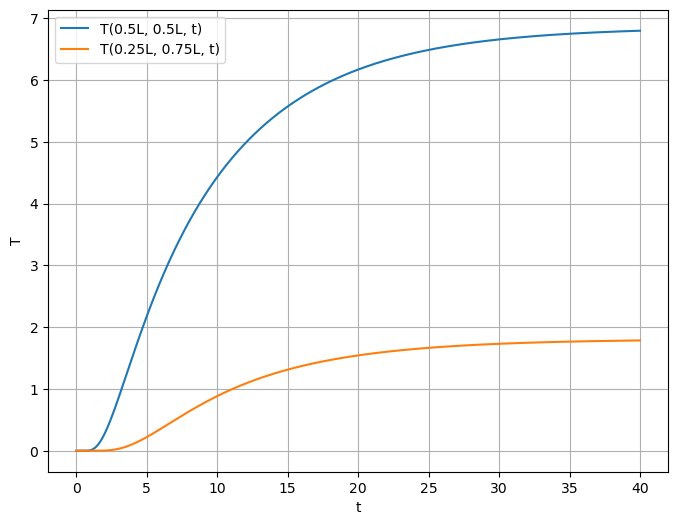

In [137]:
plt.figure(figsize=(8, 6))
plt.plot(t, T[20, 20, :], label="T(0.5L, 0.5L, t)")
plt.plot(t, T[10, 30, :], label="T(0.25L, 0.75L, t)")
plt.xlabel("t")
plt.ylabel("T")
plt.grid()
plt.legend()
plt.show()

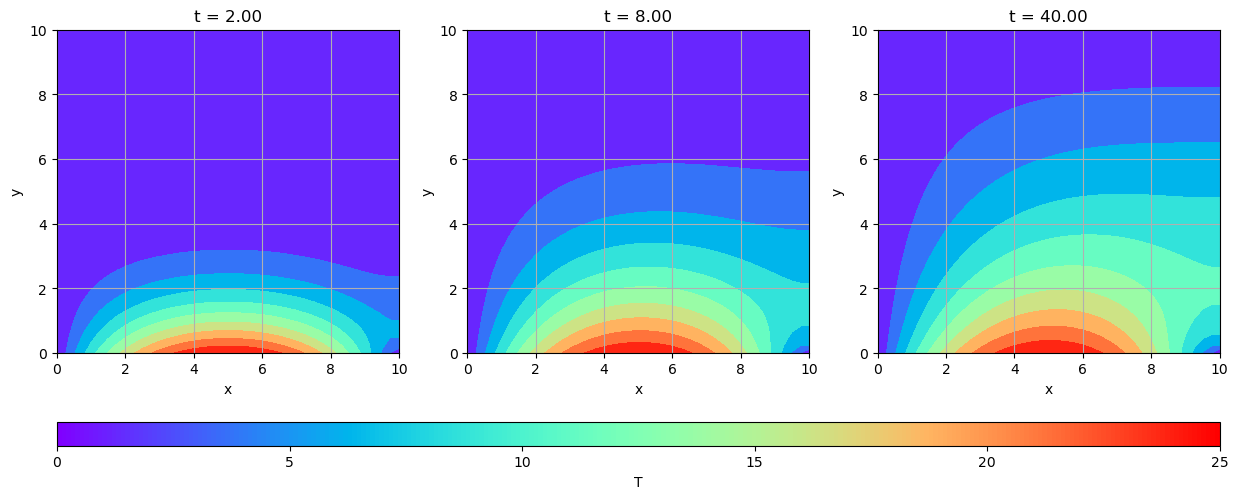

In [22]:
X, Y = np.meshgrid(x, y)
contour_regions = np.linspace(0, np.max(T), 11)
n1 = int(2 / dt)
n2 = int(8 / dt)
n3 = int(40 / dt)

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
for i, n in enumerate([n1, n2, n3]):
    ax[i].contourf(X, Y, T[:, :, n].T, levels=contour_regions, cmap="rainbow")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_title(f"t = {t[n]:.2f}")
    ax[i].grid()

norm = cm.colors.Normalize(vmin=0, vmax=np.max(T))
cbar = fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="rainbow"),
    ax=ax,
    orientation="horizontal",
    pad=0.15,
    aspect=50,
)
cbar.set_label("T")
plt.show()

## 2. SOR solver for steady heat equation

Consider the steady heat equation on a square domain with $\alpha = 1$:

$~$

\begin{equation}
\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0 \quad {\rm\ for\ } x\in[0,L], \quad y\in[0,L]
\end{equation}

The boundary conditions are given by:

$~$

\begin{equation}
T(0,y) = 0 \quad {\rm\ for\ } y \in [0,L]
\end{equation}  

\begin{equation}
T(x,0) = x(L - x) \quad {\rm\ for\ } x \in [0,L]
\end{equation}

\begin{equation}
T(x,L) = 0 \quad {\rm\ for\ } x \in [0,L]
\end{equation}

\begin{equation}
\frac{\partial T}{\partial n} \biggr\rvert_{x=L} = 0 \quad {\rm\ for\ } y \in (0,L)
\end{equation}

$~$

![](BCs.png){width=400px style="display: block; margin: 0 auto"}

$~$

- The Dirichlet conditions on the edges include the corner points
- The Neumann condition on the right edge exludes the corner points
- This represents a plate with a heated bottom edge and insulated right edge

$~$

Our initial guess for the solution is given by:

\begin{equation}
T^{k=0}(x, y) = \begin{cases}
            x(L-x)       & \text{if $y = 0$},\\
            0            & \text{otherwise}
        \end{cases}
\end{equation}

- This is the same as the initial temperature distribution for the transient problem

$~$

We will write a function ```SORitersolve(L, N, omega, tol, maxiter, print_iters=False)``` to solve this problem using a SOR iterative solver. We will use semi-discretization with a second order central difference scheme for the spatial derivatives and a first order one-sided difference approximation for the insulated boundary condition on the right edge. ```omega``` is the SOR parameter that is used in the update scheme $\phi_{i,j}^{k+1} = \phi_{i,j}^k + \omega(\tilde{\phi}_{i,j} - \phi^k_{i,j})$. We should see good convergence behavior around $\omega = 1.8$.

The function inputs are given by:

| Name     | Type  | Description                                                                           |
|----------|-------|---------------------------------------------------------------------------------------|
| L        | float | Domain length (domain is $x \in [0, L]$)                                              |
| N        | int   | Number of intervals to use; there are $N + 1$ equally spaced points in each direction |
| omega    | float | SOR parameter                                                                         |
| tol      | float | Stop iterations when \$\lvert T_{k+1} - T^{k} \rvert \<\$ tol                         |
| max_iter | int   | Maximum number of iterations                                                          |

$~$

The function should return the following:

| Name         | Type            | Description                                                                       
|--------------|-----------------|--------------------------------------------------                                      |
| SORitersolve | python function | Function to implement SOR solution scheme for this problem                             |
| x            | 1D numpy array  | list of all the x grid points                                                          |
| y            | 1D numpy array  | list of all the y grid points                                                          |
| T            | 2D numpy array  | T[i,j] stores the solution $T(x_i, y_i)$. The array is $(N_x + 1) \times (N_y + 1)$    |
| iter         | int             | number of iterations used before terminating                                           |
| dvals        | 1D numpy array  | array of length maxiter containing the values $d_k = \lvert T^{k+1} - T^{k} \rvert$, $k = 0,1,...,iter-1$; contains zeros for $k \geq iter$                                                                       |

$~$

The starting code below implements the Point Jacobi method to solve the problem. Your task is to modify this code to become an SOR solver. Do not change the initial guess, loop structure, or convergence checking criteria.

In [25]:
import numpy as np


def SORitersolve(L, N, omega, tol, maxiter, print_iters=False):
    """
    Solve the 2D steady state heat equation with the point SOR method
    and return the solution as a 2D array.

    Parameters:
    -----------
    L: float
        Length of the square domain
    N: int
        Number of grid points in each direction
    omega: float
        Relaxation parameter
    tol: float
        Convergence tolerance
    maxiter: int
        Maximum number of iterations
    print_iters: bool
        Print convergence behavior

    Returns:
    --------
    x: array, shape (N+1,)
        Grid points in the x direction
    y: array, shape (N+1,)
        Grid points in the y direction
    T: array, shape (N+1, N+1)
        Temperature at each point in space
    iter: int
        Number of iterations
    dvals: array, shape (iter,)
        Convergence behavior
    """

    # Discretization
    x = np.linspace(0, L, N + 1)
    y = np.linspace(0, L, N + 1)

    # Initialize
    T = np.zeros((N + 1, N + 1))
    T[:, 0] = x * (L - x)

    # Track convergence
    dvals = np.zeros(maxiter)

    # Point Jacobi
    converged = False
    iter = 0
    while not converged:
        # The 'old' guess (iteration k) is saved as the result from the previous guess
        Told = np.copy(T)

        # Iteration counter
        iter += 1

        # Loop over all nodes
        for i in range(N + 1):
            for j in range(N + 1):
                # Dirichlet BCs (left, bottom, top edges)
                if i == 0 or j == 0 or j == N:
                    continue

                # Neumann on right edge: dT/dx = 0
                elif i == N:
                    That = Told[i - 1, j]
                    T[i, j] = Told[i, j] + omega * (That - Told[i, j])

                # Interior nodes affected by the Neumann condition: i=N-1
                elif i == N - 1:
                    That = (1 / 3) * (T[i - 1, j] + Told[i, j + 1] + T[i, j - 1])

                    T[i, j] = Told[i, j] + omega * (That - Told[i, j])

                # All other interior nodes
                else:
                    That = (1 / 4) * (
                        Told[i + 1, j] + T[i - 1, j] + Told[i, j + 1] + T[i, j - 1]
                    )

                    # SOR update
                    T[i, j] = Told[i, j] + omega * (That - Told[i, j])

        # Check if converged
        d = np.linalg.norm(T - Told)
        dvals[iter - 1] = d

        # Print convergence behavior (helpful for debugging)
        if print_iters:
            print(iter, d)

        # Accept or reject current solution
        if d < tol:
            converged = True
        elif iter == maxiter:
            print("no convergence")
            break

    return x, y, T, iter - 1, dvals


def Jacobitersolve(L, N, omega, tol, maxiter, print_iters=False):
    # Discretization
    x = np.linspace(0, L, N + 1)
    y = np.linspace(0, L, N + 1)

    # Initialize
    T = np.zeros((N + 1, N + 1))
    T[:, 0] = x * (L - x)

    # Track convergence
    dvals = np.zeros(maxiter)

    # Point Jacobi
    converged = False
    iter = 0
    while not converged:
        # The 'old' guess (iteration k) is saved as the result from the previous guess
        Told = np.copy(T)

        # Iteration counter
        iter += 1

        # Loop over all nodes
        for i in range(N + 1):
            for j in range(N + 1):
                # Dirichlet BCs (left, bottom, top edges)
                if i == 0 or j == 0 or j == N:
                    continue

                # Neumann on right edge: dT/dx = 0
                elif i == N:
                    T[i, j] = Told[i - 1, j]

                # Interior nodes affected by the Neumann condition: i=N-1
                elif i == N - 1:
                    T[i, j] = (1 / 3) * (
                        Told[i - 1, j] + Told[i, j + 1] + Told[i, j - 1]
                    )

                # All other interior nodes
                else:
                    T[i, j] = (1 / 4) * (
                        Told[i + 1, j]
                        + Told[i - 1, j]
                        + Told[i, j + 1]
                        + Told[i, j - 1]
                    )

        # Check if converged
        d = np.linalg.norm(T - Told)
        dvals[iter - 1] = d

        # Print convergence behavior (helpful for debugging)
        if print_iters:
            print(iter, d)

        # Accept or reject current solution
        if d < tol:
            converged = True
        elif iter == maxiter:
            print("no convergence")
            break

    return x, y, T, iter, dvals

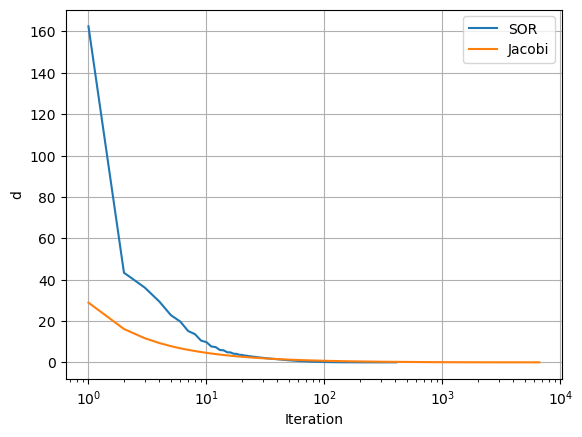

In [138]:
L = 10
N = 40
tol = 1e-6
maxiter = 10000
omega = 1.8

xSOR, ySOR, TSOR, iterSOR, dvalsSOR = SORitersolve(L, N, omega, tol, maxiter)
xJac, yJac, TJac, iterJac, dvalsJac = Jacobitersolve(L, N, omega, tol, maxiter)

plt.semilogx(np.arange(1, iterSOR + 1), dvalsSOR[:iterSOR], label="SOR")
plt.semilogx(np.arange(1, iterJac + 1), dvalsJac[:iterJac], label="Jacobi")

plt.xlabel("Iteration")
plt.ylabel("d")
plt.legend()
plt.grid()
plt.show()

## 3.

Consider the 1D Poisson equation on the domain $[0, \pi]$:

\begin{equation}
u''(x) + f(x) = 0 \quad {\rm\ for\ } x \in [0, \pi]
\end{equation}

Let $f(x) = \sin(x)$ and the boundary conditions be $u(0) = 1$ and $u'(\pi) = \frac{1}{2}$

1. Find the exact analytical solution for $u(x)$ by integrating the original differential equation twice and choosing constants of integration that enforce the boundary conditions.

2. Using a mesh of 3 elements with nodes at $(x_0, x_1, x_2, x_3) = (0, \pi/3, 2\pi/3, \pi)$, solve this problem with the finite element method. Use the linear element interpolation / basis functions:
   
   \begin{equation}
   \phi_{0}(x) = \begin{cases}
      1 - \frac{3x}{\pi} & 0 \leq x \leq \frac{\pi}{3} \\
      0 & \text{otherwise}
   \end{cases}
   \end{equation}

   \begin{equation}
   \phi_{1}(x) = \begin{cases}
      \frac{3x}{\pi} & 0 \leq x \leq \frac{\pi}{3} \\
      2 - \frac{3x}{\pi} & \frac{\pi}{3} < x \leq \frac{2\pi}{3} \\
      0 & \text{otherwise}
   \end{cases}
   \end{equation}

   \begin{equation}
   \phi_{2}(x) = \begin{cases}
      \frac{3x}{\pi} - 1 & \frac{\pi}{3} \leq x \leq \frac{2\pi}{3} \\
      3 - \frac{3x}{\pi} & \frac{2\pi}{3} < x \leq \pi \\
      0 & \text{otherwise}
   \end{cases}
   \end{equation}

   \begin{equation}
   \phi_{3}(x) = \begin{cases}
      \frac{3x}{\pi} - 2 & \frac{2\pi}{3} \leq x \leq \pi \\
      0 & \text{otherwise}
   \end{cases}
   \end{equation}
   
   The solution should include computation of the element stiffness matrices $K^{e}_{ij}$ and element force vectors $F^{e}_{i}$, assembly of the system of equations and imposition of boundary conditions to solve for the unknown nodal values $u_1, u_2, u_3$. We can use any results for the Galerkin method applied to the Poisson equaiton without re-deriving them. We can use numerical integration to compute the element force vectors.

3. Plot the FEM solution $u_{h}(x)$ vs the exact solution $u(x)$ on the same axes (plot $u(x)$ on a fine grid so it is smooth, and plot $u_{h}(x)$ on the coarse finite element mesh).

4. Plot the FEM solution derivative $u'_{h}(x)$ vs the exact solution derivative $u'(x)$ on the same axes (plot $u'(x)$ on a fine grid so it is smooth, and plot $u'_{h}(x)$ on the coarse finite element mesh).

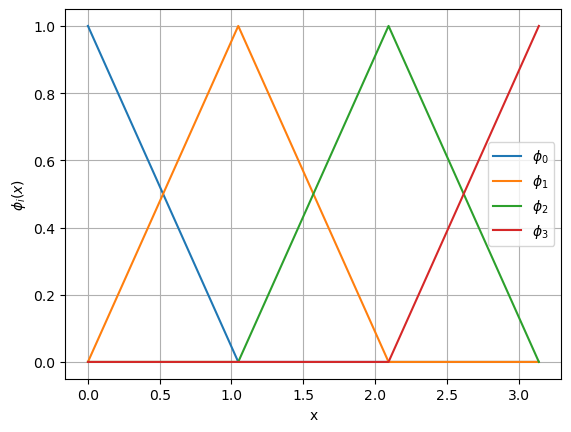

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


def phi0(x):
    return np.where((0 <= x) & (x <= np.pi / 3), 1 - 3 * x / np.pi, 0)


def phi1(x):
    return np.where(
        (0 <= x) & (x <= np.pi / 3),
        3 * x / np.pi,
        np.where((np.pi / 3 < x) & (x <= 2 * np.pi / 3), 2 - 3 * x / np.pi, 0),
    )


def phi2(x):
    return np.where(
        (np.pi / 3 <= x) & (x <= 2 * np.pi / 3),
        3 * x / np.pi - 1,
        np.where((2 * np.pi / 3 < x) & (x <= np.pi), 3 - 3 * x / np.pi, 0),
    )


def phi3(x):
    return np.where((2 * np.pi / 3 <= x) & (x <= np.pi), 3 * x / np.pi - 2, 0)


x = np.linspace(0, np.pi, 100)
plt.plot(x, phi0(x), label=r"$\phi_0$")
plt.plot(x, phi1(x), label=r"$\phi_1$")
plt.plot(x, phi2(x), label=r"$\phi_2$")
plt.plot(x, phi3(x), label=r"$\phi_3$")
plt.xlabel("x")
plt.ylabel(r"$\phi_i(x)$")
plt.grid()
plt.legend()
plt.show()

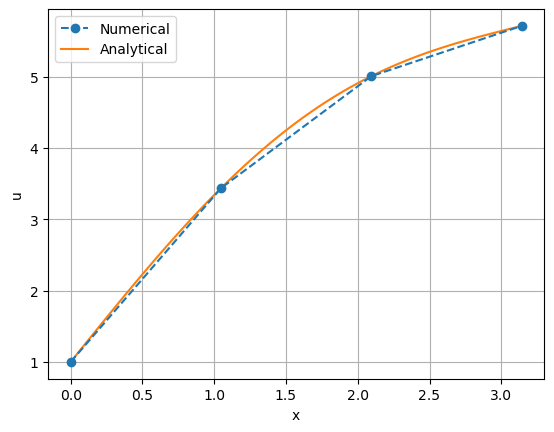

In [142]:
mesh = np.array([0, np.pi / 3, 2 * np.pi / 3, np.pi])
# mesh = np.linspace(0, np.pi, 1000)
f = lambda x: np.sin(x)
u0 = 1
numel = len(mesh) - 1
numnp = len(mesh)
nen = 2
xmin = mesh[0]
xmax = mesh[-1]
x = mesh.copy()
LM = np.zeros((nen, numel), dtype=int)
for e in range(numel):
    LM[0, e] = e
    LM[1, e] = e + 1

K = np.zeros((numnp, numnp))
F = np.zeros(numnp)

for e in range(numel):
    i1 = LM[0, e]
    i2 = LM[1, e]
    x1 = x[i1]
    x2 = x[i2]
    dxe = x2 - x1
    Ke = np.array([[1, -1], [-1, 1]]) * (1 / dxe)
    N1 = lambda x: (x2 - x) / dxe
    N2 = lambda x: (x - x1) / dxe
    Fe = np.zeros(nen)
    F1 = quad(lambda x: N1(x) * f(x), x1, x2)[0]
    F2 = quad(lambda x: N2(x) * f(x), x1, x2)[0]
    Fe[0] = F1
    Fe[1] = F2

    for i in range(nen):
        I = LM[i, e]
        F[I] += Fe[i]
        for j in range(nen):
            J = LM[j, e]
            K[I, J] += Ke[i, j]

# Apply Dirichlet boundary condition at x = 0
K[0, :] = 0
K[0, 0] = 1 
F[0] = u0  

# Apply Neumann boundary condition at x = pi
F[-1] += 1 / 2

u = np.linalg.solve(K, F)

# Analytical solution
C1 = 3 / 2
C2 = 1
u_analytical = lambda x: np.sin(x) + C1 * x + C2
xfine = np.linspace(xmin, xmax, 100)

# Plot the solution
plt.plot(x, u, label="Numerical", marker="o", linestyle = '--', zorder=10)
plt.plot(xfine, u_analytical(xfine), label="Analytical")
plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.grid()
plt.show()

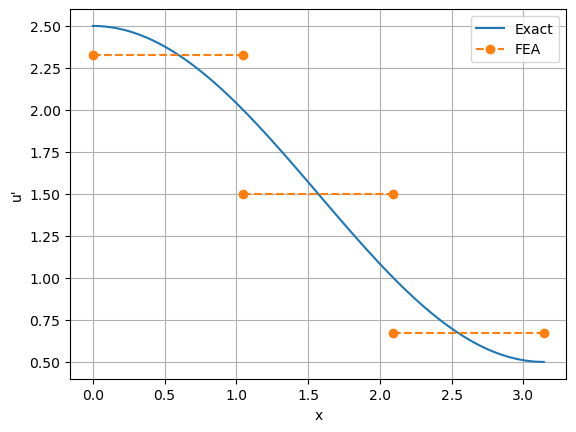

In [160]:
du_analytical = lambda x: np.cos(x) + C1
xfine = np.linspace(xmin, xmax, 100)

plt.figure()
plt.plot(xfine, du_analytical(xfine), label="Analytical")
for e in range(numel):
    # Global element nodes
    i1 = LM[0, e]
    i2 = LM[1, e]

    # Element coordinates
    x1 = x[i1]
    x2 = x[i2]

    # Element displacements
    u1 = u[i1]
    u2 = u[i2]

    # Element derivative: constant when using linear basis functions
    du_fea = (u2 - u1) / (x2 - x1)

    # Add to the plot
    plt.plot([x1, x2], [du_fea, du_fea], linestyle = '--', marker = 'o', color = 'C1')

plt.xlabel("x")
plt.ylabel("u'")
plt.legend(["Exact", "FEA"])
plt.grid()
plt.show()